![08HW-1.jpg](08HW-1.jpg)

# Problem 3

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.RdPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    return cm

In [3]:
train = np.loadtxt('10HW3_train.txt', dtype = np.int)
val = np.loadtxt('10HW3_validate.txt', dtype = np.int)
test = np.loadtxt('10HW3_test.txt', dtype = np.int)
train_x = train[:,0:784]
train_y = train[:,784]
val_x = val[:,0:784]
val_y = val[:,784]
test_x = test[:,0:784]
test_y = test[:,784]
k = [1, 3, 5, 11, 16, 21]

In [4]:
train_err = [];test_err = [];val_err = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pre_train = knn.predict(train_x)
    pre_test = knn.predict(test_x)
    pre_val = knn.predict(val_x)
    
    err_train = ((pre_train-train_y) != 0)
    train_err.append(round(np.sum(err_train)/1000, 3))
    err_test = ((pre_test-test_y) != 0)
    test_err.append(round(np.sum(err_test)/300, 3))
    err_val = ((pre_val-val_y) != 0)
    val_err.append(round(np.sum(err_val)/300, 3))

In [5]:
print('Training error for k = [1, 3, 5, 11, 16, 21] is\n', train_err)
print('Test error for k = [1, 3, 5, 11, 16, 21] is\n', test_err)
print('Validation error for k = [1, 3, 5, 11, 16, 21] is\n', val_err)
print('\n')
print('The best k for validation data is', k[np.argmin(val_err)], 'and validation error is', np.min(val_err))
print('The best k for test data is', k[np.argmin(test_err)], 'and test error is', np.min(test_err))

Training error for k = [1, 3, 5, 11, 16, 21] is
 [0.0, 0.068, 0.084, 0.118, 0.139, 0.155]
Test error for k = [1, 3, 5, 11, 16, 21] is
 [0.107, 0.097, 0.083, 0.127, 0.137, 0.153]
Validation error for k = [1, 3, 5, 11, 16, 21] is
 [0.127, 0.143, 0.13, 0.173, 0.197, 0.203]


The best k for validation data is 1 and validation error is 0.127
The best k for test data is 5 and test error is 0.083


In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x,train_y)
pre_train = knn.predict(train_x)
pre_test = knn.predict(test_x)
pre_val = knn.predict(val_x)

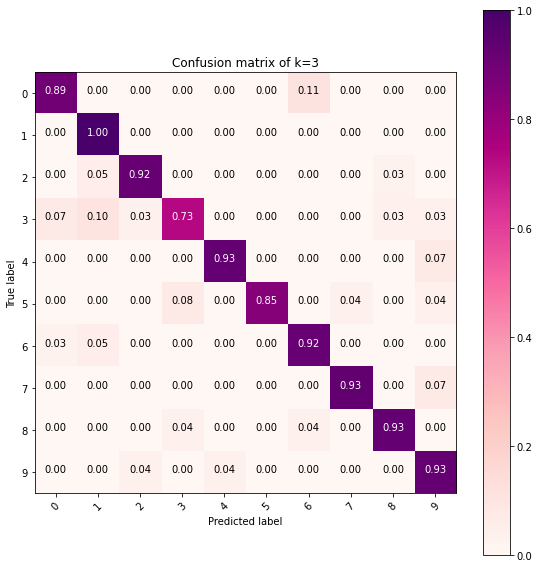

The easiest to classify is 1
The hardest to classify is 3


In [7]:
plt.figure(figsize=(8,8))
target_names = ['0','1','2','3','4','5','6','7','8','9']
cnf_matrix = confusion_matrix(test_y, pre_test)
normal_cm = plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True,
                    title='Confusion matrix of k=3')
plt.show()
print('The easiest to classify is', target_names[np.argmax(np.diagonal(normal_cm))])
print('The hardest to classify is', target_names[np.argmin(np.diagonal(normal_cm))])

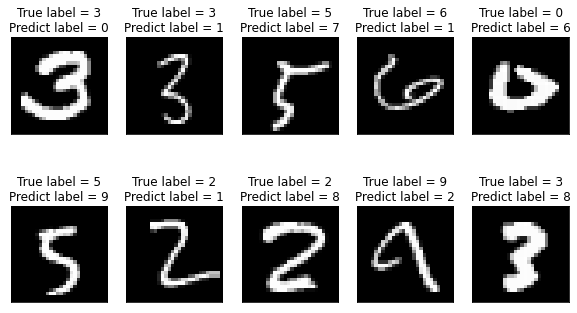

In [9]:
g = 0
plt.figure(figsize=(10,15), facecolor='w')
for i in range(len(test_y)):
    if g < 10:
        if test_y[i] != pre_test[i]:
            plt.subplot(5,5,(g+1))
            plt.title('True label = ' + str(test_y[i])+ '\n' + 'Predict label = ' + str(pre_test[i]))
            plt.imshow(np.reshape(test_x[i,:], (28, 28)), cmap = 'gray')
            plt.xticks([])
            plt.yticks([])
            g+=1
    else:
        break

plt.show()